In [4]:
import pandas as pd

## Values considered “missing”

In [ ]:
# As data comes in many shapes and forms, pandas aims to be flexible with regard to handling missing data. While NaN is the default missing value marker for reasons of computational speed and convenience, we need to be able to easily detect this value with data of different types: floating point, integer, boolean, and general object. In many cases, however, the Python None will arise and we wish to also consider that “missing” or “not available” or “NA”.

In [ ]:
# If you want to consider inf and -inf to be “NA” in computations, you can set pandas.options.mode.use_inf_as_na = True.

In [ ]:
df = pd.DataFrame(
    np.random.randn(5, 3),
    index=["a", "c", "e", "f", "h"],
    columns=["one", "two", "three"],
)
df["four"] = "bar"
df["five"] = df["one"] > 0
df2 = df.reindex(["a", "b", "c", "d", "e", "f", "g", "h"])
df2

In [ ]:
# To make detecting missing values easier (and across different array dtypes), pandas provides the isna() and notna() functions, which are also methods on Series and DataFrame objects:

In [ ]:
df2.isna()

In [ ]:
# One has to be mindful that in Python (and NumPy), the nan's don’t compare equal, but None's do. Note that pandas/NumPy uses the fact that np.nan != np.nan, and treats None like np.nan.

In [2]:
import numpy as np
None == None  # noqa: E711
np.nan == np.nan

False

In [ ]:
# So as compared to above, a scalar equality comparison versus a None/np.nan doesn’t provide useful information.

In [3]:
df2["one"] == np.nan

NameError: name 'df2' is not defined

## Integer dtypes and missing data

In [ ]:
# Because NaN is a float, a column of integers with even one missing values is cast to floating-point dtype (see Support for integer NA for more). pandas provides a nullable integer array, which can be used by explicitly requesting the dtype:
pd.Series([1, 2, np.nan, 4], dtype=pd.Int64Dtype()
# Alternatively, the string alias dtype='Int64' (note the capital "I") can be used.
# See Nullable integer data type for more.

## Datetimes

In [ ]:
# For datetime64[ns] types, NaT represents missing values. This is a pseudo-native sentinel value that can be represented by NumPy in a singular dtype (datetime64[ns]). pandas objects provide compatibility between NaT and NaN.

In [ ]:
df2 = df.copy()
df2["timestamp"] = pd.Timestamp("20120101")

In [ ]:
df2.loc[["a", "c", "h"], ["one", "timestamp"]] = np.nan

In [ ]:
df2.dtypes.value_counts()

## Insert Missing data

In [ ]:
# You can insert missing values by simply assigning to containers. The actual missing value used will be chosen based on the dtype.

# For example, numeric containers will always use NaN regardless of the missing value type chosen:

In [ ]:
s=pd.Series([1,2,3])
# s.loc[0]=None
# Likewise, datetime containers will always use NaT.

# For object containers, pandas will use the value given:

In [3]:
s = pd.Series(["a", "b", "c"])
s.loc[0] = None
s.loc[1] = np.nan

NameError: name 'np' is not defined

## Calculations with missing data

In [ ]:
# The descriptive statistics and computational methods discussed in the data structure overview (and listed here and here) are all written to account for missing data. For example:

# When summing data, NA (missing) values will be treated as zero.

# If the data are all NA, the result will be 0.

# Cumulative methods like cumsum() and cumprod() ignore NA values by default, but preserve them in the resulting arrays. To override this behaviour and include NA values, use skipna=False.

In [ ]:
df["one"].sum()

In [ ]:
df.mean(1)

In [ ]:
df.cumsum()

# Filling missing values: fillna

In [ ]:
df2
df2.fillna(0)
df2["one"].fillna("missing")

In [ ]:
# Using the same filling arguments as reindexing, we can propagate non-NA values forward or backward:

In [ ]:
# Fill gaps forward or backward

In [ ]:
df.fillna(method="pad")


In [ ]:
# Limit the amount of filling

In [ ]:
# If we only want consecutive gaps filled up to a certain number of data points, we can use the limit keyword:

In [ ]:
df.fillna(method="pad", limit=1)

In [11]:
df.fillna(method="pad", limit=1)

,a,b
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


## Calculations with missing data

In [ ]:
    # The descriptive statistics and computational methods discussed in the data structure overview (and listed here and here) are all written to account for missing data. For example:

    # When summing data, NA (missing) values will be treated as zero.

    # If the data are all NA, the result will be 0.

    # Cumulative methods like cumsum() and cumprod() ignore NA values by default, but preserve them in the resulting arrays. To override this behaviour and include NA values, use skipna=False.

In [17]:
df

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [ ]:
df.cumsum()

In [14]:
df.cumsum(skipna=False)

TypeError: can only concatenate str (not "float") to str

In [18]:
df["one"].sum()

KeyError: 'one'

## Sum/prod of empties/nans

In [ ]:
# # This behavior is now standard as of v0.22.0 and is consistent with the default in numpy; previously sum/prod of all-NA or empty Series/DataFrames would return NaN. See v0.22.0 whatsnew for more.
# The sum of an empty or all-NA Series or column of a DataFrame is 0.

In [6]:
# The sum of an empty or all-NA Series or column of a DataFrame is 0.
import pandas as pd
import numpy as np
pd.Series([np.nan]).sum()

0.0

In [7]:
# The product of an empty or all-NA Series or column of a DataFrame is 1.
pd.Series([np.nan]).prod()
pd.Series([], dtype="float64").prod()

1.0

## NA values in GroupBy

In [ ]:
df.groupby("one").mean()

2

## Interpolation 

In [ ]:
## Both Series and DataFrame objects have interpolate() that, by default, performs linear interpolation at missing data points. -->
ts
ts.count()
ts.plot()
ts.interpolate()

In [ ]:
# You can also interpolate with a DataFrame:
df = pd.DataFrame(
    {
        "A": [1, 2.1, np.nan, 4.7, 5.6, 6.8],
        "B": [0.25, np.nan, np.nan, 4, 12.2, 14.4],
    }
)
df.interploate()

In [ ]:
# # The method argument gives access to fancier interpolation methods. If you have scipy installed, you can pass the name of a 1-d interpolation routine to method. You’ll want to consult the full scipy interpolation documentation and reference guide for details. The appropriate interpolation method will depend on the type of data you are working with.
# If you are dealing with a time series that is growing at an increasing rate, method='quadratic' may be appropriate.

# If you have values approximating a cumulative distribution function, then method='pchip' should work well.

# To fill missing values with goal of smooth plotting, consider method='akima'.


In [ ]:
df.interpolate(method="barycentric")

In [ ]:
df.interpolate(method="pchip")

In [ ]:
df.interpolate(method="akima")

In [ ]:
# When interpolating via a polynomial or spline approximation, you must also specify the degree or order of the approximation:
df.interpolate(method="spline", order=2)
df.interpolate(method="polynomial", order=2)
df.interpolate(method="polynomial", order=2)


<AxesSubplot:>

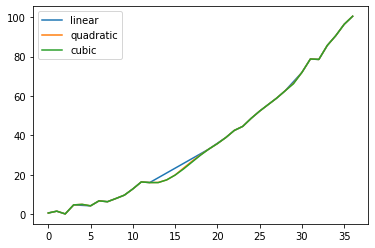

In [13]:
# Compare several methods:
np.random.seed(2)
ser = pd.Series(np.arange(1, 10.1, 0.25) ** 2 + np.random.randn(37))

missing = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])

ser[missing] = np.nan

methods = ["linear", "quadratic", "cubic"]

df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})

df.plot()

In [ ]:
# Another use case is interpolation at new values. Suppose you have 100 observations from some distribution. And let’s suppose that you’re particularly interested in what’s happening around the middle. You can mix pandas’ reindex and interpolate methods to interpolate at the new values.

In [ ]:
ser = pd.Series(np.sort(np.random.uniform(size=100)))
new_index = ser.index.union(pd.Index([49.25, 49.5, 49.75, 50.25, 50.5, 50.75]))

interp_s = ser.reindex(new_index).interpolate(method="pchip")

## Inserting missing data -->

In [ ]:
# You can insert missing values by simply assigning to containers. The actual missing value used will be chosen based on the dtype.
# For example, numeric containers will always use NaN regardless of the missing value type chosen:

In [8]:
s = pd.Series([1, 2, 3])
s.loc[0] = None
s = pd.Series(["a", "b", "c"])
s.loc[0] = None

s.loc[1] = np.nan


## Interpolation limits

In [13]:
# Like other pandas fill methods, interpolate() accepts a limit keyword argument. Use this argument to limit the number of consecutive NaN values filled since the last valid observation:
ser = pd.Series([np.nan, np.nan, 5, np.nan, np.nan, np.nan, 13, np.nan, np.nan])
ser.interpolate(limit=1)
ser.interpolate(limit_direction="both", limit_area="inside", limit=1)


0     NaN
1     NaN
2     5.0
3     7.0
4     NaN
5    11.0
6    13.0
7     NaN
8     NaN
dtype: float64

In [ ]:
# fill all consecutive outside values backward
ser.interpolate(limit_direction="backward", limit_area="outside")

In [ ]:
# By default, NaN values are filled in a forward direction. Use limit_direction parameter to fill backward or from both directions.

<!-- By default, NaN values are filled whether they are inside (surrounded by) existing valid values, or outside existing valid values. The limit_area parameter restricts filling to either inside or outside values. -->

In [15]:
# fill one consecutive inside value in both directions
ser.interpolate(limit_direction="both", limit_area="inside", limit=1)

0     NaN
1     NaN
2     5.0
3     7.0
4     NaN
5    11.0
6    13.0
7     NaN
8     NaN
dtype: float64

In [16]:
# fill all consecutive outside values in both directions
ser.interpolate(limit_direction="both", limit_area="outside")

0     5.0
1     5.0
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7    13.0
8    13.0
dtype: float64

## Replacing generic values

In [ ]:
# Often times we want to replace arbitrary values with other values.
# replace() in Series and replace() in DataFrame provides an efficient yet flexible way to perform such replacements.
# For a Series, you can replace a single value or a list of values by another value:

In [2]:
import pandas as pd
ser = pd.Series([0.0, 1.0, 2.0, 3.0, 4.0])
ser.replace(0, 5)

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [3]:
ser.replace([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

0    4.0
1    3.0
2    2.0
3    1.0
4    0.0
dtype: float64

In [4]:
# ou can replace a list of values by a list of other values:
ser.replace({0: 10, 1: 100})

0     10.0
1    100.0
2      2.0
3      3.0
4      4.0
dtype: float64

In [10]:
# For a DataFrame, you can specify individual values by column:
df = pd.DataFrame({"a": [0, 1, 2, 3, 4], "b": [5, 6, 7, 8, 9]})

df.replace({"a": 0, "b": 5}, 100)

,a,b
0,100,100
1,1,6
2,2,7
3,3,8
4,4,9


In [6]:
# Instead of replacing with specified values, you can treat all given values as missing and interpolate over them:
ser.replace([1, 2, 3], method="pad")


0    0.0
1    0.0
2    0.0
3    0.0
4    4.0
dtype: float64

# Dropping axis labels with missing data: dropna

In [11]:
# You may wish to simply exclude labels from a data set which refer to missing data. To do this, use dropna():
df.dropna(axis=0)
df.dropna(axis=1)
# df["one"].dropna()
# An equivalent dropna() is available for Series. DataFrame.dropna has considerably more options than Series.dropna, which can be examined in the API.

,a,b
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


# NA values in GroupBy

In [9]:
df
df.dropna(axis=0)

,a,b
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [ ]:
df.dropna(axis=1)
df["one"].dropna()

In [ ]:
# An equivalent dropna() is available for Series. DataFrame.dropna has considerably more options than Series.dropna, which can be examined in the API.

In [10]:
df.groupby("one").mean()

KeyError: 'one'

## Cleaning / filling missing data

In [ ]:
# pandas objects are equipped with various data manipulation methods for dealing with missing data.

## Filling missing values: fillna

In [2]:
# fillna() can “fill in” NA values with non-NA data in a couple of ways, which we illustrate:
# Replace NA with a scalar value

In [ ]:
# fillna() can “fill in” NA values with non-NA data in a couple of ways, which we illustrate:

In [4]:
df
df.fillna(0)
df["one"].fillna("missing")

NameError: name 'df' is not defined

In [ ]:
# Limit the amount of filling

# If we only want consecutive gaps filled up to a certain number of data points, we can use the limit keyword:

df.fillna(method="pad", limit=1)

## String/regular expression replacement

In [ ]:
# Python strings prefixed with the r character such as r'hello world' are so-called “raw” strings. They have different semantics regarding backslashes than strings without this prefix. Backslashes in raw strings will be interpreted as an escaped backslash, e.g., r'\' == '\\'. You should read about them if this is unclear.

In [9]:
d = {"a": list(range(4)), "b": list("ab.."), "c": ["a", "b", np.nan, "d"]}
df = pd.DataFrame(d)
df.replace(".", np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [8]:
# Now do it with a regular expression that removes surrounding whitespace 
df.replace(r"\s*\.\s*", np.nan, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [12]:
# Replace a few different values (list -> list):
df.replace(["a", "."], ["b", np.nan])

,a,b
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [ ]:
# list of regex -> list of regex:
df.replace([r"\.", r"(a)"], ["dot", r"\1stuff"], regex=True)

In [13]:
# Only search in column 'b' (dict -> dict):
df.replace({"b": "."}, {"b": np.nan})

,a,b
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [ ]:
# Same as the previous example, but use a regular expression for searching instead (dict of regex -> dict):

In [14]:
df.replace({"b": r"\s*\.\s*"}, {"b": np.nan}, regex=True)

,a,b
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [ ]:
# You can pass nested dictionaries of regular expressions that use regex=True:

In [15]:
df.replace({"b": {"b": r""}}, regex=True)

,a,b
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [ ]:
# Alternatively, you can pass the nested dictionary like so:

In [ ]:
df.replace(regex={"b": {r"\s*\.\s*": np.nan}})

In [ ]:
# You can also use the group of a regular expression match when replacing (dict of regex -> dict of regex), this works for lists as well.

In [ ]:
df.replace({"b": r"\s*(\.)\s*"}, {"b": r"\1ty"}, regex=True)

In [ ]:
# You can pass a list of regular expressions, of which those that match will be replaced with a scalar (list of regex -> regex).

In [16]:
df.replace([r"\s*\.\s*", r"a|b"], np.nan, regex=True)

,a,b
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [ ]:
# All of the regular expression examples can also be passed with the to_replace argument as the regex argument. In this case the value argument must be passed explicitly by name or regex must be a nested dictionary. The previous example, in this case, would then be:

In [17]:
df.replace(regex=[r"\s*\.\s*", r"a|b"], value=np.nan)

,a,b
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [ ]:
# This can be convenient if you do not want to pass regex=True every time you want to use a regular expression.

In [ ]:
#Python strings prefixed with the r character such as r'hello world' are so-called “raw” strings. They have different semantics regarding backslashes than strings without this prefix. Backslashes in raw strings will be interpreted as an escaped backslash, e.g., r'\' == '\\'. You should read about them if this is unclear.

In [13]:
import numpy as np
d = {"a": list(range(4)), "b": list("ab.."), "c": ["a", "b", np.nan, "d"]}
df = pd.DataFrame(d)
df.replace(".", np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [ ]:
df.replace(["a", "."], ["b", np.nan])
df.replace([r"\.", r"(a)"], ["dot", r"\1stuff"], regex=True)
df.replace({"b": "."}, {"b": np.nan})

In [10]:
# All of the regular expression examples can also be passed with the to_replace argument as the regex argument. In this case the value argument must be passed explicitly by name or regex must be a nested dictionary. The previous example, in this case, would then be
df.replace(regex=[r"\s*\.\s*", r"a|b"], value=np.nan)


,a,b,c
0,0,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,d


# Numeric replacement

In [ ]:
df = pd.DataFrame(np.random.randn(10, 2))
df[np.random.rand(df.shape[0]) > 0.5] = 1.5
df.replace(1.5, np.nan)

In [ ]:
# Replacing more than one value is possible by passing a list.
df00 = df.iloc[0, 0]
df.replace([1.5, df00], [np.nan, "a"])
df[1].dtype
# You can also operate on the DataFrame in place:
df.replace(1.5, np.nan, inplace=True)


<!-- Missing data casting rules and indexing -->

## Missing data casting rules and indexing -->

In [ ]:
# While pandas supports storing arrays of integer and boolean type, these types are not capable of storing missing data. Until we can switch to using a native NA type in NumPy, we’ve established some “casting rules”. When a reindexing operation introduces missing data, the Series will be cast according to the rules introduced in the table below.

In [ ]:
s = pd.Series(np.random.randn(5), index=[0, 2, 4, 6, 7])
(s > 0).dtype
crit = (s > 0).reindex(list(range(8)))


In [ ]:
# Ordinarily NumPy will complain if you try to use an object array (even if it contains boolean values) instead of a boolean array to get or set values from an ndarray (e.g. selecting values based on some criteria). If a boolean vector contains NAs, an exception will be generated:


In [ ]:
reindexed = s.reindex(list(range(8))).fillna(0)
reindexed[crit]

In [ ]:
# However, these can be filled in using fillna() and it will work fine:
reindexed[crit.fillna(False)]
# pandas provides a nullable integer dtype, but you must explicitly request it when creating the series or column. Notice that we use a capital “I” in the dtype="Int64".

## Filling with a PandasObject

In [4]:
# You can also fillna using a dict or Series that is alignable. The labels of the dict or index of the Series must match the columns of the frame you wish to fill. The use case of this is to fill a DataFrame with the mean of that column.
import numpy as np
import pandas as pd

In [7]:
import pandas as pd

In [8]:
dff = pd.DataFrame(np.random.randn(10, 3), columns=list("ABC"))

dff.iloc[3:5, 0] = np.nan

dff.iloc[4:6, 1] = np.nan

dff.iloc[5:8, 2] = np.nan

dff
dff.fillna(dff.mean())
dff.fillna(dff.mean()["B":"C"])

,A,B,C
0,0.385412,-0.467773,-1.350452
1,0.484264,0.330007,-1.443647
2,1.844583,0.815172,0.528109
3,NaN,0.170230,-0.693471
4,NaN,0.022482,-0.306549
5,-0.963167,0.022482,-0.582201
6,0.526796,-0.251139,-0.582201
7,-0.815404,-1.035083,-0.582201
8,0.065422,-0.834684,0.007096
9,-1.460502,1.453123,-0.816493


In [5]:
dff = pd.DataFrame(np.random.randn(10, 3), columns=list("ABC"))
dff.iloc[3:5, 0] = np.nan
dff.iloc[4:6, 1] = np.nan
dff.iloc[5:8, 2] = np.nan
dff.fillna(dff.mean())
dff.fillna(dff.mean()["B":"C"])

,A,B,C
0,0.085572,-0.236385,0.276694
1,-0.148945,-0.773717,-0.269458
2,2.097273,-0.718006,0.347850
3,NaN,-0.243270,0.847893
4,NaN,-0.311857,1.543041
5,0.448124,-0.311857,0.420070
6,0.582753,0.635040,0.420070
7,3.225402,-0.652658,0.420070
8,-0.243564,-0.071096,-0.589435
9,-0.327907,-0.434766,0.783908


In [6]:
# Same result as above, but is aligning the ‘fill’ value which is a Series in this case.
dff.where(pd.notna(dff), dff.mean(), axis="columns")

,A,B,C
0,0.085572,-0.236385,0.276694
1,-0.148945,-0.773717,-0.269458
2,2.097273,-0.718006,0.347850
3,0.714838,-0.243270,0.847893
4,0.714838,-0.311857,1.543041
5,0.448124,-0.311857,0.420070
6,0.582753,0.635040,0.420070
7,3.225402,-0.652658,0.420070
8,-0.243564,-0.071096,-0.589435
9,-0.327907,-0.434766,0.783908


In [ ]:
# Replacing more than one value is possible by passing a list.
df00 = df.iloc[0, 0]
df.replace([1.5, df00], [np.nan, "a"])

## Experimental NA scalar to denote missing values

In [ ]:
# Starting from pandas 1.0, an experimental pd.NA value (singleton) is available to represent scalar missing values. At this moment, it is used in the nullable integer, boolean and dedicated string data types as the missing value indicator.

# The goal of pd.NA is provide a “missing” indicator that can be used consistently across data types (instead of np.nan, None or pd.NaT depending on the data type).

# For example, when having missing values in a Series with the nullable integer dtype, it will use pd.NA:

In [ ]:
s = pd.Series([1, 2, None], dtype="Int64")


In [ ]:
# # Propagation in arithmetic and comparison operations.In general, missing values propagate in operations involving pd.NA. When one of the operands is unknown, the outcome of the operation is also unknown.
# For example, pd.NA propagates in arithmetic operations, similarly to np.nan:


In [ ]:
# In general, missing values propagate in operations involving pd.NA. When one of the operands is unknown, the outcome of the operation is also unknown.

# For example, pd.NA propagates in arithmetic operations, similarly to np.nan:

In [15]:
pd.NA ** 0
1 ** pd.NA

1

In [ ]:
# In equality and comparison operations, pd.NA also propagates. This deviates from the behaviour of np.nan, where comparisons with np.nan always return False.
pd.NA == 1

In [ ]:
pd.NA == pd.NA
pd.NA < 2.5

In [ ]:
# To check if a value is equal to pd.NA, the isna() function can be used:An exception on this basic propagation rule are reductions (such as the mean or the minimum), where pandas defaults to skipping missing values. See above for more.
pd.isna(pd.NA)



## Logical operations -->

In [ ]:
# For logical operations, pd.NA follows the rules of the three-valued logic (or Kleene logic, similarly to R, SQL and Julia). This logic means to only propagate missing values when it is logically required.

# For example, for the logical “or” operation (|), if one of the operands is True, we already know the result will be True, regardless of the other value (so regardless the missing value would be True or False). In this case, pd.NA does not propagate:

In [16]:
True | False

True

In [ ]:
# On the other hand, if one of the operands is False, the result depends on the value of the other operand. Therefore, in this case pd.NA propagates:

# False | True

<!-- NA in a boolean context -->

In [ ]:
# Since the actual value of an NA is unknown, it is ambiguous to convert NA to a boolean value. The following raises an error:

In [ ]:
bool(pd.NA)


In [ ]:
# This also means that pd.NA cannot be used in a context where it is evaluated to a boolean, such as if condition: ... where condition can potentially be pd.NA. In such cases, isna() can be used to check for pd.NA or condition being pd.NA can be avoided, for example by filling missing values beforehand.

# A similar situation occurs when using Series or DataFrame objects in if statements, see Using if/truth statements with pandas.

<!-- NA in a boolean context
Since the actual value of an NA is unknown, it is ambiguous to convert NA to a boolean value. The following raises an error: -->

In [ ]:
# This also means that pd.NA cannot be used in a context where it is evaluated to a boolean, such as if condition: ... where condition can potentially be pd.NA. In such cases, isna() can be used to check for pd.NA or condition being pd.NA can be avoided, for example by filling missing values beforehand.

# A similar situation occurs when using Series or DataFrame objects in if statements, see Using if/truth statements with pandas.

## NumPy ufuncs -->

In [ ]:
# pandas.NA implements NumPy’s __array_ufunc__ protocol. Most ufuncs work with NA, and generally return NA:

In [14]:
np.log(pd.NA)
np.add(pd.NA, 1)

<NA>

In [15]:
a = np.array([1, 2, 3])
np.greater(a, pd.NA)


array([<NA>, <NA>, <NA>], dtype=object)

<!-- pandas.NA implements NumPy’s __array_ufunc__ protocol. Most ufuncs work with NA, and generally return NA -->

In [17]:
np.log(pd.NA)
np.add(pd.NA, 1)

<NA>

In [18]:
a = np.array([1, 2, 3])

np.greater(a, pd.NA)

array([<NA>, <NA>, <NA>], dtype=object)

## Conversion

In [20]:
# If you have a DataFrame or Series using traditional types that have missing data represented using np.nan, there are convenience methods convert_dtypes() in Series and convert_dtypes() in DataFrame that can convert data to use the newer dtypes for integers, strings and booleans listed here. This is especially helpful after reading in data sets when letting the readers such as read_csv() and read_excel() infer default dtypes.

# In this example, while the dtypes of all columns are changed, we show the results for the first 10 columns.

In [ ]:
bb = pd.read_csv("data/baseball.csv", index_col="id")

In [ ]:
bb[bb.columns[:10]].dtypes

In [ ]:
bbn = bb.convert_dtypes()
bbn[bbn.columns[:10]].dtypes